# Extract MNF boundary feature

## Scope

- Read in boundary shapefile
    - National Forest Administrative Boundaries polygon shapefile
- Convert shapefile to GeoDataFrame
- Extract desired features:
    - From National Forests polygon layer, extract Malheur National Forest boundary polygon
- Export extracted features as GeoJSON

## Import necessary packages

In [1]:
import geopandas as gpd
import os

## Read in shapefiles

In [2]:
# Read in shapefiles as GeoDataFrames
forests_gdf = gpd.read_file("../../script_outputs/boundary_polygons/boundary_shps/Forest_Administrative_Boundaries_(Feature_Layer).shp")

## Extract MNF boundary gdf

In [5]:
malheur_bounds = forests_gdf.loc[forests_gdf["FORESTNAME"].str.contains("Malheur", case = False, na = False)] # Return all records where 'FORESTNAME' includes substring 'Malheur', case agnostic
malheur_bounds.head() 

,OBJECTID,ADMINFORES,REGION,FORESTNUMB,FORESTORGC,FORESTNAME,GIS_ACRES,SHAPELEN,SHAPEAREA,geometry
65,207000,99060400010343,06,04,0604,Malheur National Forest,1786533.257,14.733412,0.813817,"MULTIPOLYGON (((-13217646.175 5551723.552, -13..."


<Axes: >

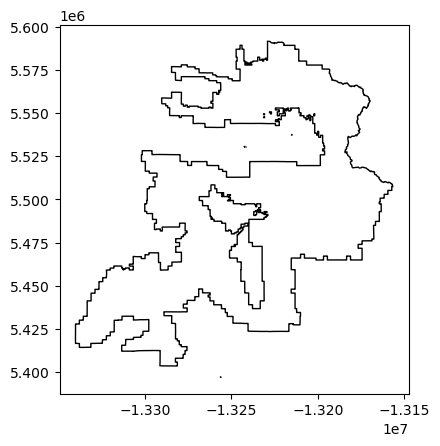

In [6]:
malheur_bounds.plot(facecolor = "None")

## Export GeoJSONs

In [7]:
# Define the output file path
mnf_output_file = os.path.join(r"../../subsetted_data", "malheur_bounds.geojson")

# Export to GeoJSON
malheur_bounds.to_file(mnf_output_file, driver = "GeoJSON")

print(f"GeoJSON file saved at: {mnf_output_file}")

GeoJSON file saved at: ../../subsetted_data/malheur_bounds.geojson
